In [19]:
import numpy as np
import networkx as  nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import math
import random

In [20]:
A = pd.read_csv("dolphin_edges(1).csv")

In [21]:
A

,From,To
0,CCL,Double
1,DN16,Feather
2,DN21,Feather
3,Beak,Fish
4,Bumper,Fish
...,...,...
154,Topless,Zap
155,Ripplefluke,Zig
156,Bumper,Zipfel
157,SN4,Zipfel


In [4]:
G = nx.from_pandas_edgelist(A , source="From" , target="To")

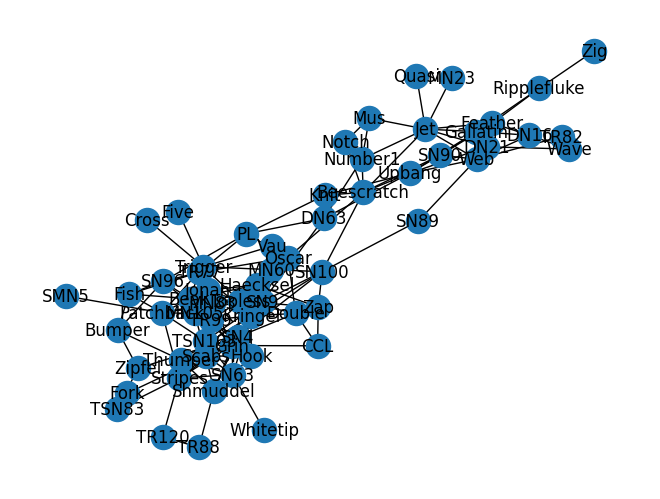

In [5]:
nx.draw(G, with_labels=True )
plt.show()

In [6]:
nx.adjacency_matrix(G).toarray()

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
edges = list(G.edges())
edges

[('CCL', 'Double'),
 ('CCL', 'Grin'),
 ('CCL', 'Zap'),
 ('Double', 'Kringel'),
 ('Double', 'Oscar'),
 ('Double', 'SN4'),
 ('Double', 'Topless'),
 ('Double', 'Zap'),
 ('DN16', 'Feather'),
 ('DN16', 'Gallatin'),
 ('DN16', 'Wave'),
 ('DN16', 'Web'),
 ('Feather', 'DN21'),
 ('Feather', 'Gallatin'),
 ('Feather', 'Jet'),
 ('Feather', 'Ripplefluke'),
 ('Feather', 'SN90'),
 ('Feather', 'Web'),
 ('DN21', 'Gallatin'),
 ('DN21', 'Jet'),
 ('DN21', 'Upbang'),
 ('DN21', 'Wave'),
 ('DN21', 'Web'),
 ('Beak', 'Fish'),
 ('Beak', 'Grin'),
 ('Beak', 'Haecksel'),
 ('Beak', 'SN9'),
 ('Beak', 'SN96'),
 ('Beak', 'TR77'),
 ('Fish', 'Bumper'),
 ('Fish', 'Patchback'),
 ('Fish', 'SN96'),
 ('Fish', 'TR77'),
 ('Bumper', 'SN96'),
 ('Bumper', 'Thumper'),
 ('Bumper', 'Zipfel'),
 ('Gallatin', 'Jet'),
 ('Gallatin', 'Ripplefluke'),
 ('Gallatin', 'SN90'),
 ('Gallatin', 'Upbang'),
 ('Gallatin', 'Web'),
 ('Grin', 'Hook'),
 ('Grin', 'MN83'),
 ('Grin', 'Scabs'),
 ('Grin', 'Shmuddel'),
 ('Grin', 'SN4'),
 ('Grin', 'SN63'),
 ('Gr

 **Indicateurs d'un réseau**

In [8]:
print("#calcule de la density")
print(nx.density(G))
print("#calcule de la degree de centrality")
print(nx.degree_centrality(G))

#calcule de la density
0.08408249603384453
#calcule de la degree de centrality
{'CCL': 0.04918032786885246, 'Double': 0.09836065573770492, 'DN16': 0.06557377049180328, 'Feather': 0.11475409836065574, 'DN21': 0.09836065573770492, 'Beak': 0.09836065573770492, 'Fish': 0.0819672131147541, 'Bumper': 0.06557377049180328, 'Gallatin': 0.13114754098360656, 'Grin': 0.19672131147540983, 'Haecksel': 0.11475409836065574, 'Hook': 0.09836065573770492, 'Beescratch': 0.13114754098360656, 'Jet': 0.14754098360655737, 'Jonah': 0.11475409836065574, 'Knit': 0.06557377049180328, 'DN63': 0.0819672131147541, 'Kringel': 0.14754098360655737, 'MN105': 0.09836065573770492, 'MN23': 0.01639344262295082, 'MN83': 0.09836065573770492, 'Mus': 0.04918032786885246, 'Notch': 0.04918032786885246, 'Number1': 0.0819672131147541, 'Oscar': 0.0819672131147541, 'Patchback': 0.14754098360655737, 'PL': 0.0819672131147541, 'Quasi': 0.01639344262295082, 'Ripplefluke': 0.04918032786885246, 'Fork': 0.01639344262295082, 'Scabs': 0.16393

In [9]:
print("closeness_centrality" , nx.closeness_centrality(G))

closeness_centrality {'CCL': 0.30808080808080807, 'Double': 0.3630952380952381, 'DN16': 0.23828125, 'Feather': 0.25206611570247933, 'DN21': 0.2675438596491228, 'Beak': 0.3465909090909091, 'Fish': 0.3128205128205128, 'Bumper': 0.2824074074074074, 'Gallatin': 0.27111111111111114, 'Grin': 0.3765432098765432, 'Haecksel': 0.3388888888888889, 'Hook': 0.32972972972972975, 'Beescratch': 0.3719512195121951, 'Jet': 0.3096446700507614, 'Jonah': 0.3370165745856354, 'Knit': 0.3160621761658031, 'DN63': 0.3652694610778443, 'Kringel': 0.391025641025641, 'MN105': 0.3333333333333333, 'MN23': 0.23735408560311283, 'MN83': 0.3128205128205128, 'Mus': 0.25523012552301255, 'Notch': 0.2772727272727273, 'Number1': 0.3160621761658031, 'Oscar': 0.3652694610778443, 'Patchback': 0.32275132275132273, 'PL': 0.32275132275132273, 'Quasi': 0.23735408560311283, 'Ripplefluke': 0.21631205673758866, 'Fork': 0.2687224669603524, 'Scabs': 0.3652694610778443, 'Shmuddel': 0.3160621761658031, 'SMN5': 0.24497991967871485, 'SN100':

In [10]:
print("betweenness_centrality" , nx.betweenness_centrality(G))

betweenness_centrality {'CCL': 0.0023737965131407756, 'Double': 0.022365737598409235, 'DN16': 0.004380300179480508, 'Feather': 0.02089438036159347, 'DN21': 0.029372536747686685, 'Beak': 0.01908259621374376, 'Fish': 0.016092020911693046, 'Bumper': 0.00907281243346817, 'Gallatin': 0.0528463284386915, 'Grin': 0.06197200484885411, 'Haecksel': 0.03329222098223321, 'Hook': 0.0033047098620869104, 'Beescratch': 0.213324435532811, 'Jet': 0.11430016291546968, 'Jonah': 0.0148548997169549, 'Knit': 0.013314394166853183, 'DN63': 0.11823861926938342, 'Kringel': 0.10264573972090967, 'MN105': 0.012700653930162124, 'MN23': 0.0, 'MN83': 0.0073830434896008665, 'Mus': 0.0016441148408361526, 'Notch': 0.004362477231329691, 'Number1': 0.029236860493157976, 'Oscar': 0.06675695466395656, 'Patchback': 0.06552928249649563, 'PL': 0.03305046077177225, 'Quasi': 0.0, 'Ripplefluke': 0.03278688524590164, 'Fork': 0.0, 'Scabs': 0.057166440117259784, 'Shmuddel': 0.032694759702956426, 'SMN5': 0.0, 'SN100': 0.24823719602893

***Common Neighbors***



In [11]:
targets = nx.non_edges(G)
common_neighbors = [(e[0], e[1],
                     len(list(nx.common_neighbors(G , e[0] , e[1]))))
                    for e in targets]

sorted(common_neighbors , key = lambda x: x[2] , reverse = True)

[('MN105', 'MN83', 4),
 ('TR99', 'SN63', 4),
 ('TR99', 'SN4', 4),
 ('Upbang', 'Feather', 4),
 ('Upbang', 'Jet', 4),
 ('DN16', 'DN21', 4),
 ('Haecksel', 'Trigger', 4),
 ('DN21', 'SN90', 4),
 ('SN90', 'Jet', 4),
 ('Hook', 'Stripes', 4),
 ('SN63', 'SN4', 4),
 ('MN105', 'TR99', 3),
 ('MN105', 'Stripes', 3),
 ('Web', 'Beescratch', 3),
 ('MN83', 'TR99', 3),
 ('SN9', 'Hook', 3),
 ('SN9', 'Shmuddel', 3),
 ('SN9', 'SN63', 3),
 ('SN9', 'Stripes', 3),
 ('Kringel', 'Topless', 3),
 ('Kringel', 'Grin', 3),
 ('Kringel', 'Scabs', 3),
 ('Kringel', 'SN4', 3),
 ('Double', 'SN100', 3),
 ('Patchback', 'Haecksel', 3),
 ('Patchback', 'Grin', 3),
 ('Patchback', 'SN4', 3),
 ('Zap', 'SN4', 3),
 ('Jonah', 'TR99', 3),
 ('Topless', 'SN100', 3),
 ('Topless', 'Grin', 3),
 ('Topless', 'Scabs', 3),
 ('Notch', 'Jet', 3),
 ('Gallatin', 'Beescratch', 3),
 ('DN16', 'Jet', 3),
 ('DN16', 'SN90', 3),
 ('Haecksel', 'Grin', 3),
 ('Mus', 'Beescratch', 3),
 ('TSN103', 'Scabs', 3),
 ('TSN103', 'Stripes', 3),
 ('Hook', 'Shmuddel',

**Jaccard Coefficients**








In [45]:
from networkx.algorithms.link_prediction import jaccard_coefficient
jaccard_coefficient=list(nx.resource_allocation_index(G))
sorted(jaccard_coefficient , key=lambda x: x[2] , reverse=True)

[('Haecksel', 'Trigger', 0.9004329004329005),
 ('DN16', 'DN21', 0.878968253968254),
 ('Notch', 'Jet', 0.6583333333333333),
 ('Mus', 'Beescratch', 0.6444444444444444),
 ('Topless', 'SN100', 0.6242424242424243),
 ('Upbang', 'Feather', 0.6027777777777777),
 ('Beescratch', 'DN63', 0.5928571428571429),
 ('Zipfel', 'Stripes', 0.5909090909090909),
 ('Grin', 'Patchback', 0.5595238095238095),
 ('Upbang', 'Jet', 0.5277777777777777),
 ('SN90', 'DN21', 0.5218253968253967),
 ('SN90', 'Jet', 0.503968253968254),
 ('Stripes', 'TR88', 0.5),
 ('SN100', 'Web', 0.5),
 ('Shmuddel', 'TR120', 0.5),
 ('SN63', 'SN4', 0.4928571428571428),
 ('TSN83', 'SN4', 0.47619047619047616),
 ('Kringel', 'SN4', 0.47619047619047616),
 ('SN63', 'TR99', 0.46111111111111114),
 ('Haecksel', 'Grin', 0.4583333333333333),
 ('Web', 'Beescratch', 0.45396825396825397),
 ('Gallatin', 'Beescratch', 0.45396825396825397),
 ('Topless', 'Kringel', 0.4523809523809524),
 ('PL', 'Upbang', 0.45),
 ('PL', 'Beescratch', 0.45),
 ('MN83', 'MN105', 0

**Resource Allocation**

In [46]:
, resource_allocation_index
resource_allocation_index=list(nx.resource_allocation_index(G))
sorted(resource_allocation_index , key=lambda x: x[2] , reverse=True)

[('Haecksel', 'Trigger', 0.9004329004329005),
 ('DN16', 'DN21', 0.878968253968254),
 ('Notch', 'Jet', 0.6583333333333333),
 ('Mus', 'Beescratch', 0.6444444444444444),
 ('Topless', 'SN100', 0.6242424242424243),
 ('Upbang', 'Feather', 0.6027777777777777),
 ('Beescratch', 'DN63', 0.5928571428571429),
 ('Zipfel', 'Stripes', 0.5909090909090909),
 ('Grin', 'Patchback', 0.5595238095238095),
 ('Upbang', 'Jet', 0.5277777777777777),
 ('SN90', 'DN21', 0.5218253968253967),
 ('SN90', 'Jet', 0.503968253968254),
 ('Stripes', 'TR88', 0.5),
 ('SN100', 'Web', 0.5),
 ('Shmuddel', 'TR120', 0.5),
 ('SN63', 'SN4', 0.4928571428571428),
 ('TSN83', 'SN4', 0.47619047619047616),
 ('Kringel', 'SN4', 0.47619047619047616),
 ('SN63', 'TR99', 0.46111111111111114),
 ('Haecksel', 'Grin', 0.4583333333333333),
 ('Web', 'Beescratch', 0.45396825396825397),
 ('Gallatin', 'Beescratch', 0.45396825396825397),
 ('Topless', 'Kringel', 0.4523809523809524),
 ('PL', 'Upbang', 0.45),
 ('PL', 'Beescratch', 0.45),
 ('MN83', 'MN105', 0

**Adamic-Adar Index**

In [47]:
adamic_adar_index = list(nx.adamic_adar_index(G))
sorted(adamic_adar_index , key=lambda x: x[2], reverse=True)

[('Haecksel', 'Trigger', 2.9317364012342075),
 ('DN16', 'DN21', 2.8926113435351204),
 ('Upbang', 'Feather', 2.1154635213872655),
 ('Notch', 'Jet', 2.012472508149437),
 ('Mus', 'Beescratch', 1.986693774499868),
 ('Upbang', 'Jet', 1.9750269337906414),
 ('SN90', 'DN21', 1.963814645015908),
 ('Topless', 'SN100', 1.9486065526106957),
 ('SN90', 'Jet', 1.930814649609145),
 ('SN63', 'SN4', 1.9087330552060944),
 ('Zipfel', 'Stripes', 1.8597274323132096),
 ('Beescratch', 'DN63', 1.8565807973738442),
 ('SN63', 'TR99', 1.8499543261497624),
 ('MN83', 'MN105', 1.8203448290106674),
 ('TR99', 'SN4', 1.8118671042605898),
 ('Grin', 'Patchback', 1.7933564893654796),
 ('Stripes', 'Hook', 1.7346548246723308),
 ('Kringel', 'SN4', 1.6301195954722452),
 ('Haecksel', 'Grin', 1.5971196000654824),
 ('Web', 'Beescratch', 1.5903528902427813),
 ('Gallatin', 'Beescratch', 1.5903528902427813),
 ('Topless', 'Kringel', 1.5859073112907487),
 ('SN9', 'SN63', 1.5580716067295781),
 ('Shmuddel', 'SN63', 1.5580716067295781),

In [22]:
# Créer un ensemble d'arêtes existantes (liens)
edges = list(G.edges())
y_true = [1] * len(edges)

In [23]:
# Créer un ensemble d'arêtes inexistantes (non liées) en générant aléatoirement des paires de nœuds
non_edges = []
while len(non_edges) < len(edges):
    nodes = list(G.nodes())
    edge = tuple(random.sample(nodes, 2))
    if edge not in edges and edge not in non_edges:
        non_edges.append(edge)

In [24]:
# Créer un ensemble d'arêtes pour évaluation
X_test = edges + non_edges
y_test = [1] * len(edges) + [0] * len(non_edges)

In [25]:
# Calculer l'AUC pour différentes méthodes de similarité
auc_scores = {}

# Méthode de similarité : Common Neighbors
def common_neighbors_similarity(G, node1, node2):
    return len(list(nx.common_neighbors(G, node1, node2)))

X_common_neighbors = [common_neighbors_similarity(G, node1, node2) for (node1, node2) in X_test]
auc_common_neighbors = roc_auc_score(y_test, X_common_neighbors)
auc_scores['Common Neighbors'] = auc_common_neighbors

# Méthode de similarité : Jaccard
def jaccard_similarity(G, node1, node2):
    neighbors1 = set(G.neighbors(node1))
    neighbors2 = set(G.neighbors(node2))
    if len(neighbors1.union(neighbors2)) == 0:
        return 0
    return len(neighbors1.intersection(neighbors2)) / len(neighbors1.union(neighbors2))

X_jaccard = [jaccard_similarity(G, node1, node2) for (node1, node2) in X_test]
auc_jaccard = roc_auc_score(y_test, X_jaccard)
auc_scores['Jaccard'] = auc_jaccard

#Méthode de similarité : Adamic-Adar
def adamic_adar_similarity(G, node1, node2):
    aa_index = sum(1 / math.log(len(list(G.neighbors(neighbor)))) for neighbor in nx.common_neighbors(G, node1, node2))
    return aa_index

X_adamic_adar = [adamic_adar_similarity(G, node1, node2) for (node1, node2) in X_test]
auc_adamic_adar = roc_auc_score(y_test, X_adamic_adar)
auc_scores['Adamic-Adar'] = auc_adamic_adar

# Méthode de similarité : Salton
def salton_similarity(G, node1, node2):
    neighbors1 = set(G.neighbors(node1))
    neighbors2 = set(G.neighbors(node2))
    if len(neighbors1) == 0 or len(neighbors2) == 0:
        return 0
    return len(neighbors1.intersection(neighbors2)) / math.sqrt(len(neighbors1) * len(neighbors2))

X_salton = [salton_similarity(G, node1, node2) for (node1, node2) in X_test]
auc_salton = roc_auc_score(y_test, X_salton)
auc_scores['Salton'] = auc_salton

# Méthode de similarité : Resource Allocation
def resource_allocation_similarity(G, node1, node2):
    ra_index = sum(1 / len(list(G.neighbors(neighbor))) for neighbor in nx.common_neighbors(G, node1, node2))
    return ra_index

X_resource_allocation = [resource_allocation_similarity(G, node1, node2) for (node1, node2) in X_test]
auc_resource_allocation = roc_auc_score(y_test, X_resource_allocation)
auc_scores['Resource Allocation'] = auc_resource_allocation

# Méthode de similarité : Preferential Attachment
def preferential_attachment_similarity(G, node1, node2):
    pa_index = len(list(G.neighbors(node1))) * len(list(G.neighbors(node2)))
    return pa_index

X_preferential_attachment = [preferential_attachment_similarity(G, node1, node2) for (node1, node2) in X_test]
auc_preferential_attachment = roc_auc_score(y_test, X_preferential_attachment)
auc_scores['Preferential Attachment'] = auc_preferential_attachment

# Méthode de similarité : Hub Depressed

def hub_depressed_similarity(G, node1, node2):
    neighbors1 = set(G.neighbors(node1))
    neighbors2 = set(G.neighbors(node2))

    if len(neighbors1) == 0 or len(neighbors2) == 0:
        return 0

    common_neighbors = neighbors1.intersection(neighbors2)
    if len(common_neighbors) == 0:
        return 0

    hub1 = sum(1 / len(list(G.neighbors(neighbor))) for neighbor in neighbors1)
    hub2 = sum(1 / len(list(G.neighbors(neighbor))) for neighbor in neighbors2)

    return len(common_neighbors) / (hub1 + hub2)

X_hub_depressed = [hub_depressed_similarity(G, node1, node2) for (node1, node2) in X_test]
auc_hub_depressed = roc_auc_score(y_test, X_hub_depressed)
auc_scores['Hub Depressed'] = auc_hub_depressed

# Afficher les scores AUC pour chaque méthode de similarité
for method, auc_score in auc_scores.items():
    print(f'AUC ({method}): {auc_score}')


AUC (Common Neighbors): 0.7957161504687317
AUC (Jaccard): 0.7821684268818481
AUC (Adamic-Adar): 0.7987816937621139
AUC (Salton): 0.7761955618844192
AUC (Resource Allocation): 0.7970017008820854
AUC (Preferential Attachment): 0.7473201218306237
AUC (Hub Depressed): 0.7767691151457617


In [26]:
# un dataframe pour stocker les scores AUC
df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
df

,AUC
Common Neighbors,0.795716
Jaccard,0.782168
Adamic-Adar,0.798782
Salton,0.776196
Resource Allocation,0.797002
Preferential Attachment,0.747320
Hub Depressed,0.776769


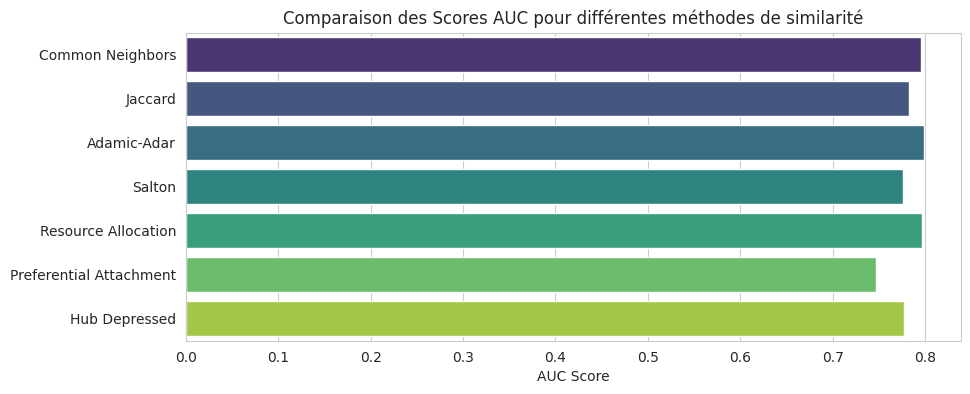

In [27]:
# Créer un tableau de bord pour comparer les AUC
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))
sns.barplot(x='AUC', y=df.index, data=df, palette="viridis")
plt.xlabel('AUC Score')
plt.title('Comparaison des Scores AUC pour différentes méthodes de similarité')
plt.show()